# RANDOM FOREST Regressor

### Random Forest on diabetes dataset

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\harsh\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading the dataset**

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diab = load_diabetes()

**Exploring the dataset**

In [10]:
diab

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
dir(diab)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [5]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [11]:
diab.data.shape

(442, 10)

In [12]:
diab.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [13]:
diab.target.shape

(442,)

In [6]:
diab.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [8]:
diab_df = pd.DataFrame(diab.data, columns=diab.feature_names)
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [14]:
X = diab.data
y = diab.target

### Train test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
x_train.shape, x_test.shape

((353, 10), (89, 10))

# Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

In [21]:
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [22]:
y_pred = model.predict(x_test)

In [83]:
model.estimators_[:10]

[DecisionTreeRegressor(max_features='auto', random_state=1608637542),
 DecisionTreeRegressor(max_features='auto', random_state=1273642419),
 DecisionTreeRegressor(max_features='auto', random_state=1935803228),
 DecisionTreeRegressor(max_features='auto', random_state=787846414),
 DecisionTreeRegressor(max_features='auto', random_state=996406378),
 DecisionTreeRegressor(max_features='auto', random_state=1201263687),
 DecisionTreeRegressor(max_features='auto', random_state=423734972),
 DecisionTreeRegressor(max_features='auto', random_state=415968276),
 DecisionTreeRegressor(max_features='auto', random_state=670094950),
 DecisionTreeRegressor(max_features='auto', random_state=1914837113)]

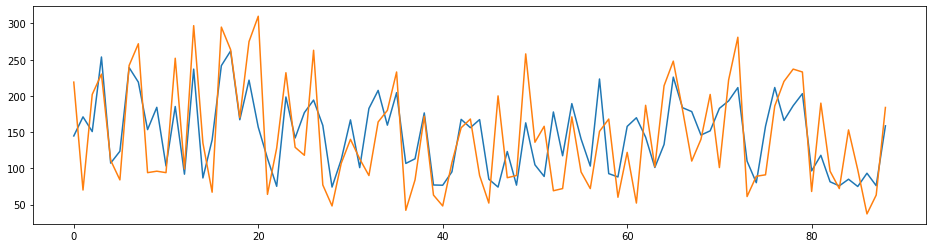

In [23]:
plt.figure(figsize=(16, 4))
plt.plot(y_pred)
plt.plot(y_test)

In [24]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9241665694822965, 0.44409093042429393)

In [84]:
def get_scores(**params):
    model = RandomForestRegressor(**params, n_jobs=-1, random_state=42)
    model.fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    return {'Train Accuracy': train_acc, 'Test Accuracy': test_acc}

def get_errors(n_est):
    model = RandomForestRegressor(n_est, n_jobs=-1, random_state=42)
    model.fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    return {'n_estimators': n_est, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc}

In [89]:
get_scores(n_estimators=90, max_depth=4, max_features=7)

{'Train Accuracy': 0.6520120762542441, 'Test Accuracy': 0.49299938910748886}

In [59]:
get_scores(max_depth=5)

{'Train Accuracy': 0.7405813246899475, 'Test Accuracy': 0.45531027946609104}

In [66]:
get_scores(max_features=3)

{'Train Accuracy': 0.9206031070328258, 'Test Accuracy': 0.4669953242002103}

In [79]:
get_scores(max_features=3, max_depth=7)

{'Train Accuracy': 0.8211721524015471, 'Test Accuracy': 0.4631922420491489}

In [81]:
get_scores(bootstrap=False)

{'Train Accuracy': 1.0, 'Test Accuracy': 0.14977022488565928}

**SIMPLE HYPERPARAMETER TUNING**

In [87]:
%%time
diab_errors = pd.DataFrame([get_errors(n_est) for n_est in range(50, 151, 10)])

Wall time: 5.58 s


In [88]:
diab_errors

,n_estimators,Train Accuracy,Test Accuracy
0,50,0.923443,0.427090
1,60,0.923620,0.427089
2,70,0.925351,0.432363
3,80,0.924855,0.433565
4,90,0.925298,0.444711
5,100,0.924167,0.444091
6,110,0.923802,0.442448
7,120,0.923199,0.440248
8,130,0.923758,0.438213
9,140,0.924970,0.434708


In [90]:
model = RandomForestRegressor(n_estimators=90, max_depth=4, max_features=7, n_jobs=-1, random_state=42).fit(x_train, y_train)

In [94]:
y_pred = model.predict(x_test)

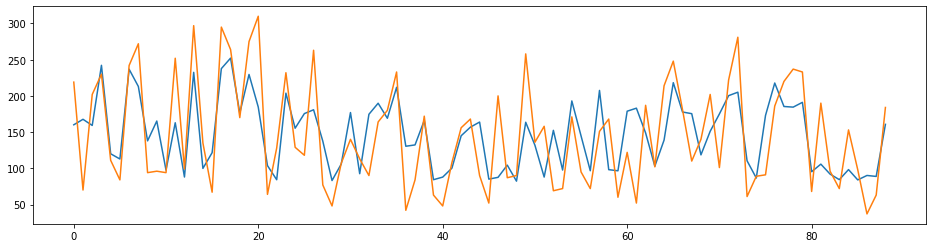

In [100]:
plt.figure(figsize=(16, 4))
plt.plot(y_pred)
plt.plot(y_test)

**ACCURACY CALCULATION**

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
mean_squared_error(y_test, y_pred)

2686.1661730991436

In [97]:
r2_score(y_test, y_pred)

0.49299938910748875

In [98]:
y_pred

array([160.09368999, 167.67876805, 159.18750734, 242.22655971,
       120.06330999, 112.84606463, 236.82484189, 213.04474974,
       137.88618952, 165.27196327,  97.49001394, 162.89094083,
        87.95874384, 232.51850885,  99.8625238 , 121.58942673,
       237.67439927, 252.16360677, 176.35122896, 229.59561036,
       184.63420136, 103.7272681 ,  84.21042313, 203.75644611,
       155.36224909, 175.55529936, 180.837948  , 137.50415793,
        83.08403042, 105.91176817, 176.99625859,  92.53537891,
       174.6015077 , 189.86880503, 169.11044305, 211.86025187,
       130.46350123, 132.29333022, 166.12366075,  84.26018376,
        87.84282026, 100.26955034, 144.92344809, 156.80049295,
       163.86778273,  85.03949731,  87.52003367, 104.39170969,
        82.25437132, 163.6003791 , 131.78593104,  87.90228564,
       152.43300898,  97.58843563, 193.03631175, 144.7134819 ,
        96.61450952, 207.54743136,  98.11707673,  96.55500256,
       178.85193036, 183.04316686, 148.80224106, 102.91

In [99]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])